<a href="https://colab.research.google.com/github/MistuPallavi/bengali_sentence_analysis/blob/master/Ben_sentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import sys
print(sys.version)

3.6.9 (default, Oct  8 2020, 12:12:24) 
[GCC 8.4.0]


In [10]:
!pip install xlrd
!pip install psycopg2

In [11]:
pip install bnlp_toolkit

In [12]:
!pip install bangla-stemmer

In [13]:
pip install psycopg2-binary

In [14]:
from bnlp import NLTKTokenizer
from bnlp import BengaliWord2Vec
from bnlp.corpus import stopwords
from bnlp.corpus.util import remove_stopwords
from bangla_stemmer.stemmer import stemmer
from numpy.random import _pickle
import re
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import psycopg2 as ps

In [21]:
!git clone https://github.com/MistuPallavi/bengali_sentence_analysis.git
#column_name=["Statement","Label"]
#sentence_path="https://github.com/MistuPallavi/bengali_sentence_analysis/blob/master/bengali_sentiment.xlsx"
#read_file=pd.read_excel(sentence_path,0,header=None,names=column_name)



fatal: destination path 'bengali_sentence_analysis' already exists and is not an empty directory.


In [23]:
read_file=pd.read_excel("/content/bengali_sentence_analysis/bengali_sentiment.xlsx")
read_file.to_csv("/content/bengali_sentence_analysis/bengali_sentiment.csv",index=None,header=True)
msg=pd.read_csv("/content/bengali_sentence_analysis/bengali_sentiment.csv")


In [24]:
df=pd.DataFrame(msg)

In [25]:
#preprocessing
stopwords = stopwords()
bnltk=NLTKTokenizer()
stmr = stemmer.BanglaStemmer()
whitespace = re.compile(u"[\s\u0020\u00a0\u1680\u180e\u202f\u205f\u3000\u2000-\u200a]+", re.UNICODE)
bangla_fullstop = u"\u0964"
punctSeq   = u"['\"“”‘’]+|[.?!,…]+|[:;]+"
punc = u"[(),$%^&*+={}\[\]:\"|\'\~`<>/,¦!?½£¶¼©⅐⅑⅒⅓⅔⅕⅖⅗⅘⅙⅚⅛⅜⅝⅞⅟↉¤¿º;-]+"
corpus=[]
sentences=[]
for i in range(0,len(msg)):
 t1= whitespace.sub(" ",msg['Statement'][i]).strip() #removing of punctuations whitespace
 t1 = re.sub(punctSeq, " ", t1)
 t1 = re.sub(bangla_fullstop, " ",t1)
 t1 = re.sub(punc, " ", t1)
 result = remove_stopwords(t1, stopwords) #remove stop words
 stm=" ".join(stmr.stem(result))  #stemming
 corpus.append(stm)


applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied second rules..
applied second rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied first rules..
applied second rules..
applied first rules..
applied second rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied first rules..
applied first rules..
appl

In [27]:
#tf-idf calculation
from sklearn.feature_extraction.text import TfidfVectorizer
cv=TfidfVectorizer()
x=cv.fit_transform(corpus).toarray() 
feature_names = cv.get_feature_names() 
#x.shape
y=pd.get_dummies(msg['Label'])
y=y.iloc[:,1].values

In [44]:
#train set and test set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [45]:
#Naive Bayes classifier
from sklearn.naive_bayes import MultinomialNB
sentiment_detect=MultinomialNB().fit(x_train,y_train)
y_pred=sentiment_detect.predict(x_test)
confusion_m=confusion_matrix(y_test,y_pred)
accuracyNB=accuracy_score(y_test,y_pred)
from sklearn.metrics import classification_report
reportNB = classification_report(y_test, y_pred, output_dict=True)
print('positiveNB: ', reportNB['1'])
print('negativeNB: ', reportNB['0'])
print(accuracyNB)
print(confusion_m)

positiveNB:  {'precision': 0.5714285714285714, 'recall': 0.36363636363636365, 'f1-score': 0.4444444444444444, 'support': 11}
negativeNB:  {'precision': 0.8, 'recall': 0.9032258064516129, 'f1-score': 0.8484848484848486, 'support': 31}
0.7619047619047619
[[28  3]
 [ 7  4]]


In [46]:
#SVM
from sklearn.svm import SVC
svm_clf=SVC(kernel="linear",C=10)
svm_clf.fit(x_train,y_train)
y_predSVM=svm_clf.predict(x_test)
from sklearn.metrics import classification_report
report = classification_report(y_test, y_predSVM, output_dict=True)
print('positive: ', report['1'])
print('negative: ', report['0'])
c_mat=confusion_matrix(y_test,y_predSVM)
accuracySVM=accuracy_score(y_test,y_predSVM)
print(accuracySVM)
print(c_mat)

positive:  {'precision': 0.38461538461538464, 'recall': 0.45454545454545453, 'f1-score': 0.41666666666666663, 'support': 11}
negative:  {'precision': 0.7931034482758621, 'recall': 0.7419354838709677, 'f1-score': 0.7666666666666667, 'support': 31}
0.6666666666666666
[[23  8]
 [ 6  5]]


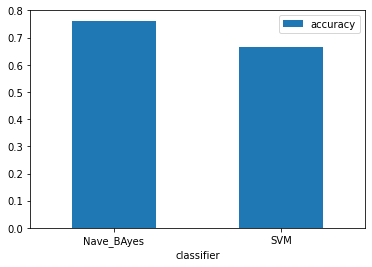

In [47]:
classifier=["Nave_BAyes","SVM"]
Accuracy=[accuracyNB,accuracySVM]
df = pd.DataFrame({'classifier':classifier,'accuracy':Accuracy})
ax = df.plot.bar(x='classifier', y='accuracy', rot=0)

# New Section